# Term2Term Mapping in Python 

## Preview of available functions

[The Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) is a metric to measure how apart are two sequences of words. It measures the **minimum number of edits** that you need to do to change a one-word sequence into the other. These edits can be *insertions, deletions or substitutions*. This metric was named after Vladimir Levenshtein, who originally considered it in 1965.

The formal definition of the Levenshtein distance between two strings a and b can be seen as follows:
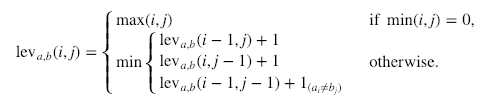

It is also possible to calculate the Levenshtein similarity ratio based on the Levenshtein distance. This can be done using the following formula:

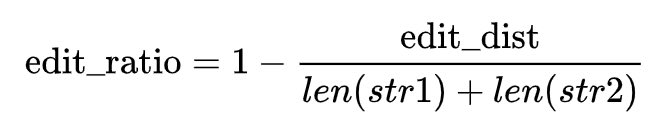
where |a| and |b| are the lengths of sequence a and sequence b respectively.

In [8]:
Str1 = "Apple Inc."
Str2 = "apple Inc"

In [9]:
import Levenshtein as lev

Distance = lev.distance(Str1.lower(),Str2.lower()),
print(Distance)
Ratio = lev.ratio(Str1.lower(),Str2.lower())
print(Ratio)

(1,)
0.9473684210526315


In [10]:
from fuzzywuzzy import fuzz
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
print(Ratio)

95


In [12]:
Str1 = "Los Angeles Lakers"
Str2 = "Lakers"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
print(Ratio)
print(Partial_Ratio)

50
100


*fuzz.partial_ratio()* works by using an "optimal partial" logic: if the short string has length k and the longer string has the length m, then the algorithm seeks the score of the best matching length-k substring.


In [13]:
Str1 = "united states v. nixon"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)

59
74
100


*fuzz.token_sort_ratio* tokenize the strings and preprocess them by turning them to lower case and getting rid of punctuation. In the next step, the string tokens get sorted alphabetically and then joined together. After that, a simple fuzz.ratio() is applied to obtain the similarity percentage.

In [14]:
Str1 = "The supreme court case of Nixon vs The United States"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
Token_Set_Ratio = fuzz.token_set_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)
print(Token_Set_Ratio)

57
77
58
95


*token_set_ratio* performs a set operation that takes out the common tokens (the intersection) and then makes fuzz.ratio() pairwise comparisons between the following new strings:
- s1 = Sorted_tokens_in_intersection
- s2 = Sorted_tokens_in_intersection + sorted_rest_of_str1_tokens
- s3 = Sorted_tokens_in_intersection + sorted_rest_of_str2_tokens
The logic behind these comparisons is that since Sorted_tokens_in_intersection is always the same, the score will tend to go up as these words make up a larger chunk of the original strings or the remaining tokens are closer to each other.

In [15]:
from fuzzywuzzy import process
str2Match = "apple inc"
strOptions = ["Apple Inc.","apple park","apple incorporated","iphone"]
Ratios = process.extract(str2Match,strOptions)
print(Ratios)
highest = process.extractOne(str2Match,strOptions)
print(highest)

[('Apple Inc.', 100), ('apple incorporated', 90), ('apple park', 67), ('iphone', 40)]
('Apple Inc.', 100)


Finally, the fuzzywuzzy package has a module called process that allows you to calculate the string with the highest similarity out of a vector of strings.

## Scikit Test

In [16]:
import pandas as pd

In [18]:
df = pd.read_csv('data/sklearn_functions.csv')
df.head()

,title,text,href
0,sklearn.base,sklearn.base,#module-sklearn.base
1,sklearn.base.BaseEstimator,base.BaseEstimator,generated/sklearn.base.BaseEstimator.html#skle...
2,sklearn.base.BiclusterMixin,base.BiclusterMixin,generated/sklearn.base.BiclusterMixin.html#skl...
3,sklearn.base.ClassifierMixin,base.ClassifierMixin,generated/sklearn.base.ClassifierMixin.html#sk...
4,sklearn.base.ClusterMixin,base.ClusterMixin,generated/sklearn.base.ClusterMixin.html#sklea...


In [26]:
df2 = pd.DataFrame(df.text + '.abv')
df2.head()

,text
0,sklearn.base.abv
1,base.BaseEstimator.abv
2,base.BiclusterMixin.abv
3,base.ClassifierMixin.abv
4,base.ClusterMixin.abv


In [35]:
terms = list(df2.text)

In [46]:
results = pd.DataFrame(columns=['term1', 'term2', 'ratio'])
results.head()

,term1,term2,ratio


In [58]:
from tqdm import tqdm

In [59]:
for i,row in tqdm(df.text.iteritems()):
    matched = process.extractOne(row,terms)
    results = results.append(pd.DataFrame({'term1': row, 'term2': matched[0], 'ratio': matched[1]}, index=[0]))
results.head()

607it [03:36,  2.81it/s]


,term1,term2,ratio
0,sklearn.base,sklearn.base.abv,95
0,base.BaseEstimator,base.BaseEstimator.abv,95
0,base.BiclusterMixin,base.BiclusterMixin.abv,95
0,base.ClassifierMixin,base.ClassifierMixin.abv,95
0,base.ClusterMixin,base.ClusterMixin.abv,95


In [61]:
results.to_csv('data/matched_terms.csv', index=False)

### Reference
[Fuzzy String Matching in Python](https://www.datacamp.com/community/tutorials/fuzzy-string-python)